<a href="https://colab.research.google.com/github/zehwakaka/Neural-networks/blob/main/pytorch_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 加载数据文件
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [ ]:
# 导入pandas库，用于读取CSV文件
import pandas
df = pandas.read_csv('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


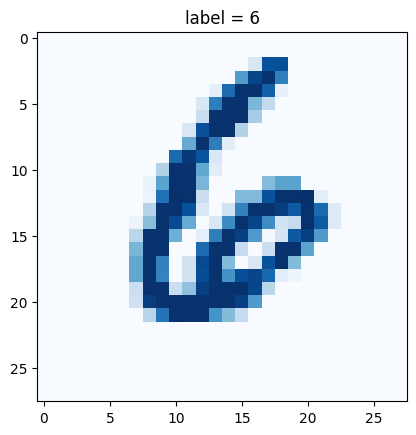

In [ ]:
# 导入pandas库用于读取CSV文件
import pandas
# 导入matplotlib用于绘图
import matplotlib.pyplot as plt
# 从DataFrame读取数据
row = 13
data = df.iloc[row]
 
# 第一个值是标签
label = data[0]
 
# 图像是余下的784个值
img = data[1:].values.reshape(28,28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [ ]:
# 导入库
import torch
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        # 初始化PyTorch父类
        super().__init__()
        # 定义神经网络层
        # self.model = nn.Sequential(
        #     nn.Linear(784, 200),
        #     nn.Sigmoid(),
        #     nn.Linear(200, 10),
        #     nn.Sigmoid()
        # )
        # 定义神经网络层
        # self.model = nn.Sequential(
        #     nn.Linear(784, 200),
        #     nn.LeakyReLU(0.02),
        #     nn.Linear(200, 10),
        #     nn.LeakyReLU(0.02)
        # )
        # 定义神经网络层
        # self.model = nn.Sequential(
        #     nn.Linear(784, 200),
        #     nn.LeakyReLU(0.02),

        #     nn.LayerNorm(200),

        #     nn.Linear(200, 10),
        #     nn.LeakyReLU(0.02)
        # )     
        # 定义神经网络层
        # self.model = nn.Sequential(
        #     nn.Linear(784, 200),
        #     nn.LeakyReLU(0.02),

        #     nn.LayerNorm(200),

        #     nn.Linear(200, 10),
        #     nn.Sigmoid()
        # )
        # 创建损失函数
        self.loss_function = nn.MSELoss()
        # self.loss_function = nn.BCELoss()
        # 创建优化器，使用简单的梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        # self.optimiser = torch.optim.Adam(self.parameters())
        # 记录训练进展的计数器和列表
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        # 直接运行模型
        return self.model(inputs)

    def train(self, inputs, targets):
        # 计算网络的输出值
        outputs = self.forward(inputs)
        # 计算损失值
        loss = self.loss_function(outputs, targets)
        # 梯度归零，反向传播，并更新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        # 每隔10个训练样本增加一次计数器的值，并将损失值添加进列表的末尾
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass


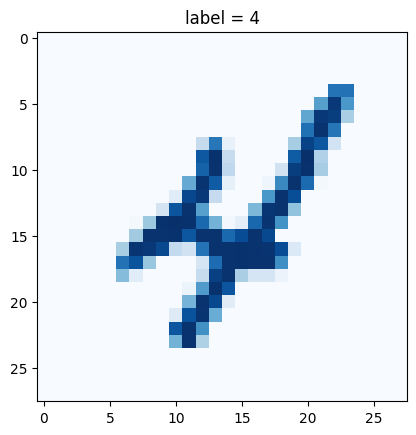

In [ ]:
from torch.utils.data import Dataset
# 导入matplotlib用于绘图
import matplotlib.pyplot as plt
import pandas

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)
    def __getitem__(self, index):
        # 目标图像 (标签)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # 图像数据, 取值范围是0~255，标准化为0~1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # 返回标签、图像数据张量以及目标张量
        return label, image_values, target
        pass

    def plot_image(self, index):
        arr = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(arr, interpolation='none', cmap='Blues')
        pass  
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')
mnist_dataset.plot_image(9)
# mnist_dataset[100]

In [ ]:

%%time 
# 创建神经网络
C = Classifier()

# 在MNIST数据集训练神经网络
epochs = 3

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass



training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 14min 56s, sys: 1.86 s, total: 14min 58s
Wall time: 15min 10s


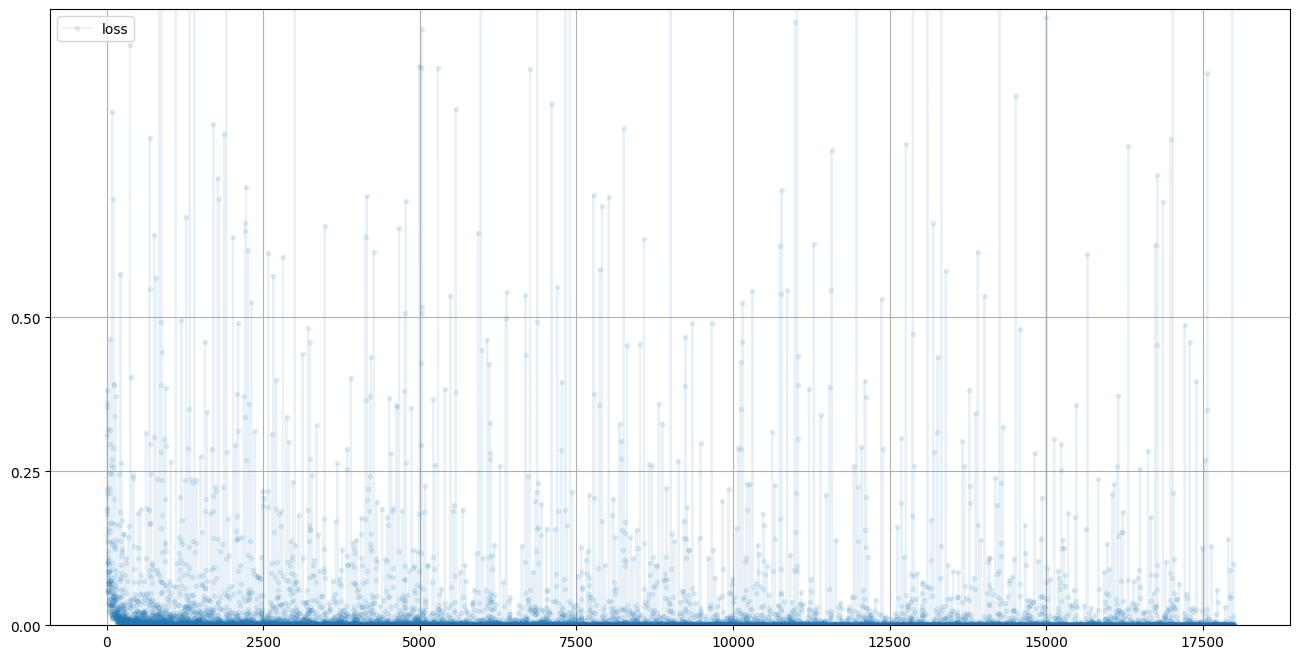

In [ ]:
# 绘制分类器损失值
C.plot_progress()

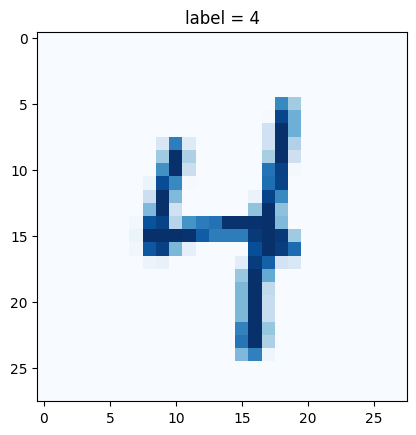

In [ ]:
# 加载MNIST测试数据
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_test.csv')

# 挑选一幅图像
record = 19
 
# 绘制图像和标签
mnist_test_dataset.plot_image(record)

<Axes: >

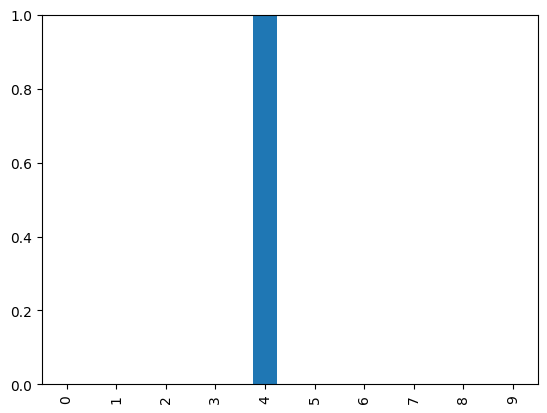

In [ ]:
image_data = mnist_test_dataset[record][1]

# 调用训练后的神经网络
output = C.forward(image_data)
# 绘制输出张量
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [ ]:
# 测试用训练数据训练后的网络

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1

    pass

print(score, items, score/items)

9742 10000 0.9742
